# Gas Sales Data Exploration

In [49]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import random
import math
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [51]:
DATA_PATH = "../data/preprocessed/full_gas_data.csv"
gas_data = pd.read_csv(DATA_PATH)
gas_data.sample(10)

,Filial,Estado,Region,Punto de venta,Date,Tipo,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
81977,CD. VICTORIA,TAMAULIPAS,Este,ATQ. VIC 54 (291),2019-01-04,ATQ,1917,182,29,18,91.887600
224496,REYNOSA,TAMAULIPAS,Centro,ATQ. REY 08,2022-03-03,ATQ,2090,185,33,21,60.628740
359442,SAN FERNANDO,TAMAULIPAS,Este,ATQ SFE 51,2017-02-28,ATQ,3230,397,35,22,107.784757
151794,LINARES,NUEVO LEON,Este,ATQ. LIN 34,2020-09-13,ATQ,154,19,37,25,57.724946
325383,SALINASVICTORIA,NUEVO LEON,Centro,ATQ. SAL VIC 81,2017-09-30,ATQ,1075,116,36,27,69.200319
155071,LINARES,NUEVO LEON,Este,ATQ. LIN 40,2017-01-17,ATQ,1274,155,36,17,67.628256
12395,ALAMO,NUEVO LEON,Este,ATQ. ALA 06,2021-06-07,ATQ,1641,147,41,28,61.264930
585446,TAMPICO,TAMAULIPAS,Sur,ATQ. TAMP 76 (044),2020-04-28,ATQ,1976,200,41,27,106.687365
150526,LINARES,NUEVO LEON,Este,ATQ. LIN 34,2017-02-14,ATQ,2091,258,37,22,68.101467
603205,TAMPICO,TAMAULIPAS,Sur,TAMPICO CARB Y DOM,2022-03-04,EC,3006,227,32,21,60.628740


## Exploration

In [52]:
gas_data.shape

(603263, 11)

In [53]:
gas_data.convert_dtypes()

,Filial,Estado,Region,Punto de venta,Date,Tipo,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
0,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-01,EC,4581,568,36,17,67.628256
1,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-02,EC,8700,1079,36,17,67.628256
2,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-03,EC,7625,940,36,17,67.628256
3,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-04,EC,10717,1328,36,17,67.628256
4,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-05,EC,8169,1014,36,17,67.628256
...,...,...,...,...,...,...,...,...,...,...,...
603258,TAMPICO,TAMAULIPAS,Sur,TAMPICO CARB Y DOM,2022-04-26,EC,4263,305,31,26,60.62874
603259,TAMPICO,TAMAULIPAS,Sur,TAMPICO CARB Y DOM,2022-04-27,EC,2878,206,31,26,60.62874
603260,TAMPICO,TAMAULIPAS,Sur,TAMPICO CARB Y DOM,2022-04-28,EC,3065,221,31,26,60.62874
603261,TAMPICO,TAMAULIPAS,Sur,TAMPICO CARB Y DOM,2022-04-29,EC,2961,211,31,26,60.62874


In [54]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603263 entries, 0 to 603262
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Filial                   603263 non-null  object 
 1   Estado                   603263 non-null  object 
 2   Region                   603263 non-null  object 
 3   Punto de venta           603263 non-null  object 
 4   Date                     603263 non-null  object 
 5   Tipo                     603263 non-null  object 
 6   $                        603263 non-null  int64  
 7   Litros                   603263 non-null  int64  
 8   Temp. Maxima             603263 non-null  int64  
 9   Temp. Promedio           603263 non-null  int64  
 10  servicio de alojamiento  603263 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 50.6+ MB


### Categorical Data

In [55]:
gas_categorical_data = gas_data.select_dtypes(exclude=['int', 'float'])
print(f"Total Categorical Columns: {len(gas_categorical_data.columns)}")
gas_categorical_data.head(5)

Total Categorical Columns: 6


,Filial,Estado,Region,Punto de venta,Date,Tipo
0,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-01,EC
1,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-02,EC
2,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-03,EC
3,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-04,EC
4,ALAMO,NUEVO LEON,Este,ALAMO,2017-01-05,EC


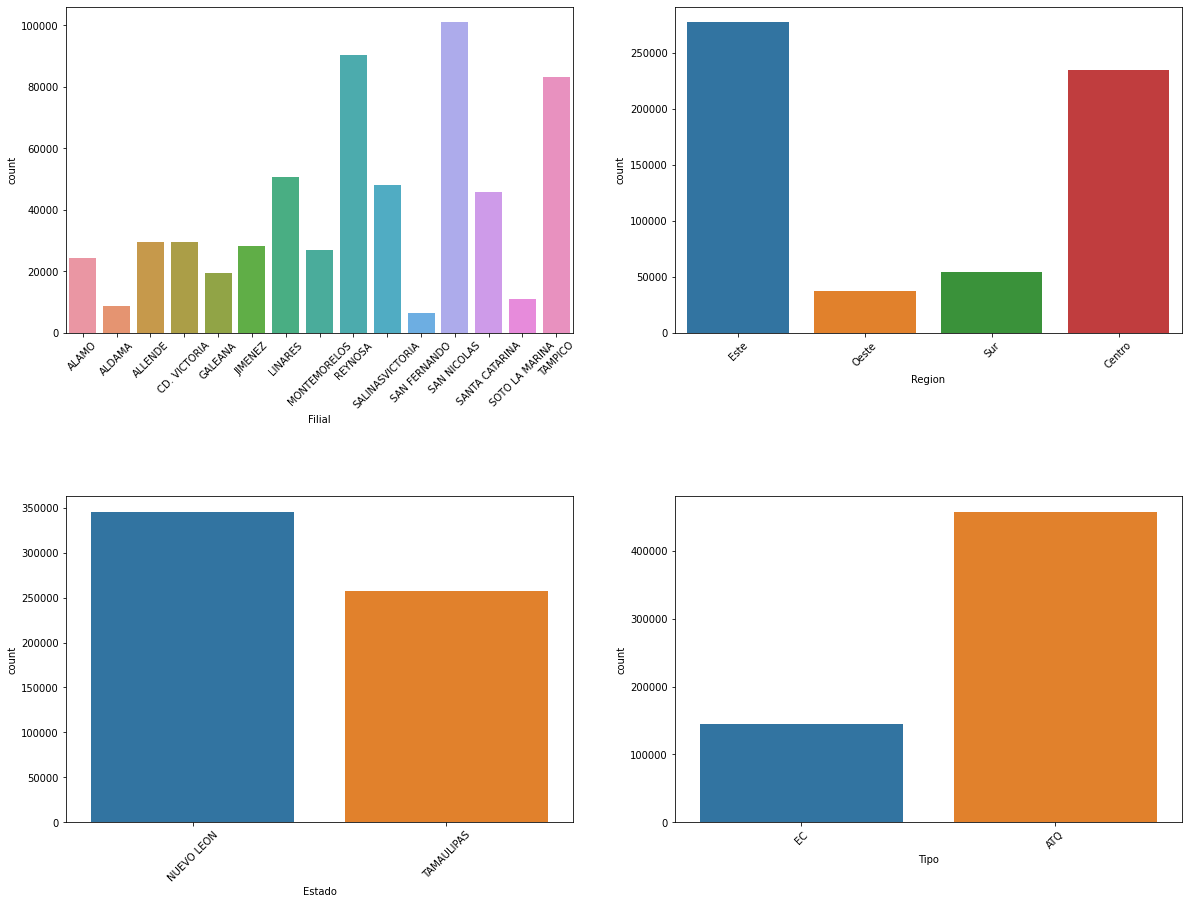

In [56]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))
fig.subplots_adjust(hspace=.5)
i = 0
for col in gas_categorical_data.columns:
    if col in ["Punto de venta", "Date"]:
        continue
    sns.countplot(gas_categorical_data[col], ax=ax[i%2, math.floor(i/2)])
    i+=1

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


### Numerical Data

In [58]:
gas_numerical_data = gas_data.select_dtypes(include=['int', 'float'])
print(f"Total Numerical Columns: {len(gas_numerical_data.columns)}")
gas_numerical_data.head(10)

Total Numerical Columns: 5


,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
0,4581,568,36,17,67.628256
1,8700,1079,36,17,67.628256
2,7625,940,36,17,67.628256
3,10717,1328,36,17,67.628256
4,8169,1014,36,17,67.628256
5,10930,1317,36,17,67.628256
6,18668,2252,36,17,67.628256
7,15017,1811,36,17,67.628256
8,12983,1565,36,17,67.628256
9,9648,1168,36,17,67.628256


In [59]:
round(gas_numerical_data.describe())

,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
count,603263.0,603263.0,603263.0,603263.0,603263.0
mean,1835.0,186.0,35.0,24.0,79.0
std,1857.0,183.0,4.0,5.0,19.0
min,0.0,0.0,26.0,12.0,56.0
25%,781.0,80.0,32.0,20.0,65.0
50%,1362.0,139.0,36.0,24.0,69.0
75%,2251.0,230.0,38.0,28.0,98.0
max,97445.0,9774.0,44.0,33.0,122.0


In [60]:
filial_df = pd.pivot_table(gas_data, index=['Filial'], values=['Litros', '$', 'Temp. Promedio', 'Temp. Maxima', 'servicio de alojamiento'],
     aggfunc={'Litros': sum,
          '$': sum,
          'Temp. Promedio': np.mean,
          'Temp. Maxima': np.mean,
          'servicio de alojamiento': np.mean})
filial_df.reset_index(inplace=True)
filial_df.sample(5)

,Filial,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
3,CD. VICTORIA,46216595,4552162,36.310322,25.410595,98.477641
7,MONTEMORELOS,43207481,4404381,35.825168,22.967535,64.856866
13,SOTO LA MARINA,16576022,1629332,36.335548,25.425464,99.082041
6,LINARES,72111383,7735598,35.796779,22.989308,64.897638
14,TAMPICO,169675688,16562743,32.431129,24.697521,99.616839


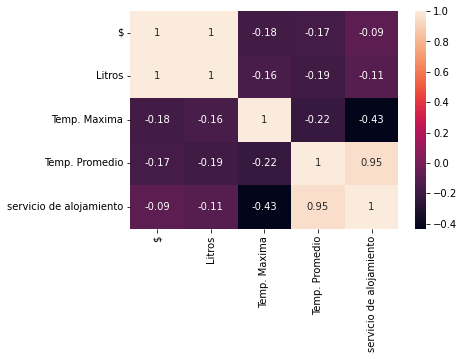

In [61]:
# Explore correlations
correlations = filial_df.corr()
sns.heatmap(correlations, annot=True)
plt.show()

In [62]:
date_df = pd.pivot_table(gas_data, index=['Date'], values=['Litros', '$', 'Temp. Promedio', 'Temp. Maxima', 'servicio de alojamiento'],
     aggfunc={'Litros': sum,
          '$': sum,
          'Temp. Promedio': np.median,
          'Temp. Maxima': np.median,
          'servicio de alojamiento': np.median})
date_df.reset_index(inplace=True)
date_df.sample(5)

,Date,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
1876,2022-02-25,868813,67102,35,15,60.628740
1571,2021-04-26,653841,57299,42,24,59.854397
954,2019-08-16,430740,53411,40,31,67.293823
493,2018-05-10,499740,50146,37,27,69.435787
322,2017-11-19,427714,40826,32,20,69.201456


<AxesSubplot:xlabel='Date'>

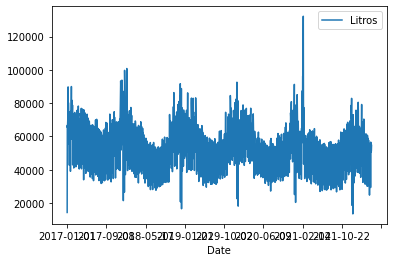

In [63]:
date_df.plot(x="Date", y = "Litros")

<AxesSubplot:xlabel='Date'>

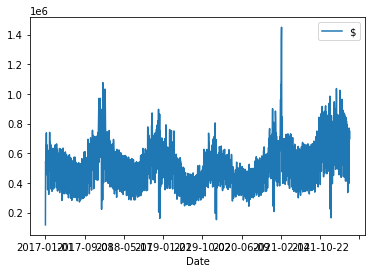

In [64]:
date_df.plot(x="Date", y = "$")

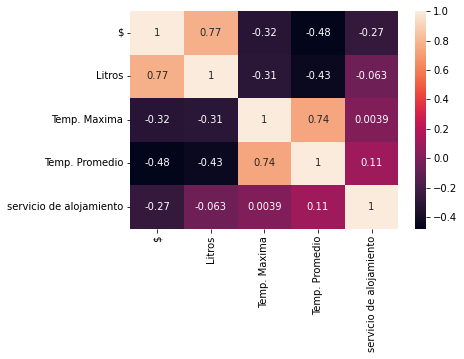

In [65]:
# Explore correlations
correlations = date_df.corr()
sns.heatmap(correlations, annot=True)
plt.show()

In [66]:
gas_data["Weekday"] = pd.to_datetime(gas_data["Date"]).dt.weekday

In [67]:
weekday_df = pd.pivot_table(gas_data, index=['Weekday'], values=['Litros', '$', 'Temp. Promedio', 'Temp. Maxima', 'servicio de alojamiento'],
     aggfunc={'Litros': sum,
          '$': sum,
          'Temp. Promedio': np.mean,
          'Temp. Maxima': np.mean,
          'servicio de alojamiento': np.mean})
weekday_df.reset_index(inplace=True)
weekday_df.sample(5)

,Weekday,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
4,4,165818819,16824124,35.221353,23.755869,79.312727
6,6,102554444,10458498,35.085068,23.674713,80.970682
3,3,162892265,16538145,35.214911,23.746553,79.213927
5,5,174535971,17754574,35.213620,23.724167,79.373271
2,2,161895153,16427909,35.215382,23.763287,79.181873


<AxesSubplot:xlabel='Weekday'>

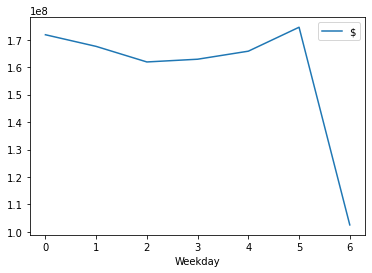

In [68]:
weekday_df.plot(x="Weekday", y="$")

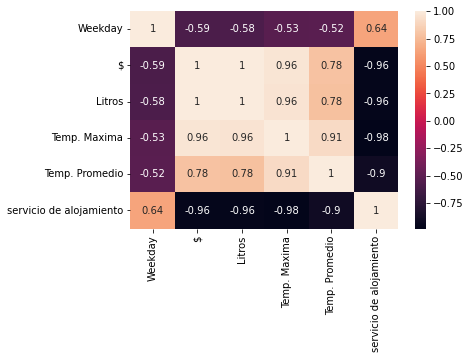

In [77]:
# Explore correlations
correlations = weekday_df.corr()
sns.heatmap(correlations, annot=True)
plt.show()

In [78]:
gas_data["Date"] = pd.to_datetime(gas_data["Date"])
gas_data["Mes"] = gas_data["Date"].dt.month
gas_data["Año"] = gas_data["Date"].dt.year


In [79]:
month_df = pd.pivot_table(gas_data, index=["Estado", "Mes", "Año"], values=['Litros', '$', 'Temp. Promedio', 'Temp. Maxima', 'servicio de alojamiento'],
     aggfunc={'Litros': sum,
          '$': sum,
          'Temp. Promedio': np.median,
          'Temp. Maxima': np.median,
          'servicio de alojamiento': np.median})
month_df.reset_index(inplace=True)
month_df.sample(5)

,Estado,Mes,Año,$,Litros,Temp. Maxima,Temp. Promedio,servicio de alojamiento
85,TAMAULIPAS,4,2020,6232991,733247,41,27,106.687365
108,TAMAULIPAS,9,2017,7085825,747216,36,28,107.706065
121,TAMAULIPAS,11,2020,6932849,709439,32,24,98.720902
94,TAMAULIPAS,6,2018,6768655,644165,38,30,85.690985
37,NUEVO LEON,7,2020,7788052,908244,39,29,60.237743


In [82]:
pd.to_datetime(month_df[["Año","Mes"]])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

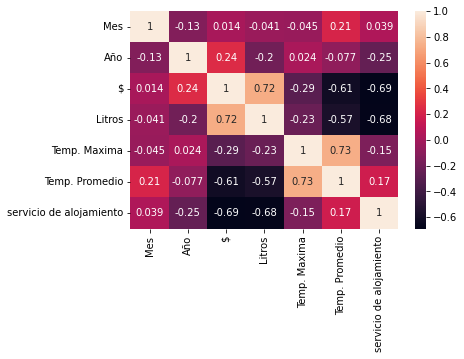

In [80]:
# Explore correlations
correlations = month_df.corr()
sns.heatmap(correlations, annot=True)
plt.show()